In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import us  # Import the us library

from causallearn.search.ConstraintBased.PC import pc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler


In [2]:
depression = pd.read_csv("Student Depression Dataset.csv")
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [6]:
depression.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
depression.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


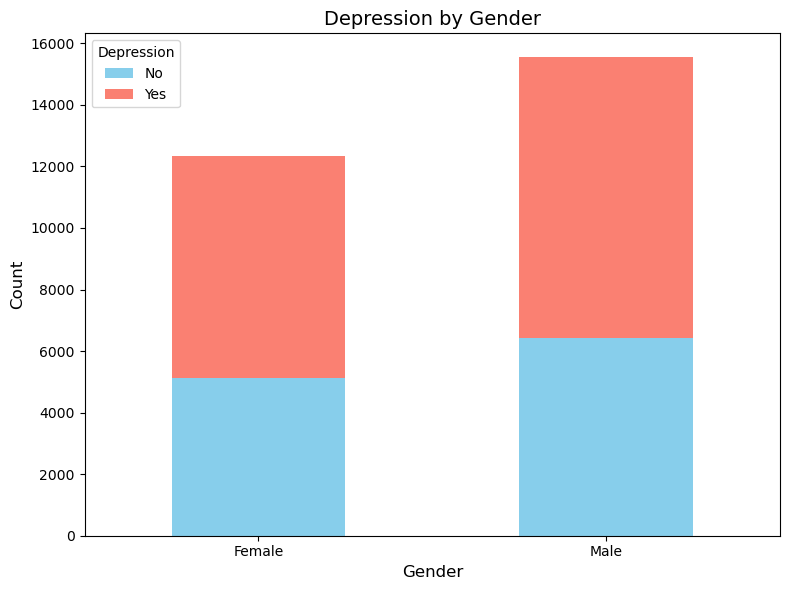

In [14]:
# Count occurrences of depression by gender
depression_counts = depression.groupby(['Gender', 'Depression']).size().unstack(fill_value=0)

# Plot the bar graph
depression_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Depression by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [20]:
depression_counts


Depression,0,1
Gender,,
Female,5133,7221
Male,6432,9115


In [21]:
depression_counts.sum(axis=1)

Gender
Female    12354
Male      15547
dtype: int64

In [22]:
5133/12354

0.4154929577464789

In [23]:
6432/15547

0.41371325657683156

In [25]:
depression['Work Pressure'].sum()

12.0

In [10]:
depression = depression.dropna()

In [33]:
data_encoded_2 = pd.get_dummies(depression, drop_first=True)
data_encoded_2

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,0,0,0,0,0,0,0,0,1,1
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,0,0,0,0,0,0,0,0,1,1
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,0,0,0,0,0,1,0,0,0,1
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,0,0,1,0,0,0,0,0,0,0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data_graph = depression.drop(['Degree', 'Profession', 'City'], axis=1)

In [3]:
depression = depression.dropna()
data_encoded = pd.get_dummies(depression, drop_first=True)
data_encoded

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,0,0,0,0,0,0,0,0,1,0
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,0,0,0,0,0,0,0,0,0,1
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,0,0,0,0,0,0,0,0,1,1
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,0,0,0,0,0,0,0,0,1,1
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,0,0,0,0,0,1,0,0,0,1
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,0,0,1,0,0,0,0,0,0,0
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# takes a long time to run
data_frame = data_encoded.sample(frac=.25, random_state=42)
# Step 1: Convert DataFrame to NumPy array>
data_array = data_frame.to_numpy()

# Step 2: Apply the PC algorithm to discover the causal graph
alpha = 0.05  # Significance level
pc_graph = pc(data_array, alpha)

# Step 3: Create labels for nodes based on DataFrame columns
node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

# Step 4: Extract edges from the pc_graph and create a NetworkX directed graph
G = nx.DiGraph()
G.add_nodes_from(node_labels.keys())

# Add edges based on the adjacency matrix
for i in range(len(pc_graph.G.graph)):
    for j in range(len(pc_graph.G.graph)):
        if pc_graph.G.graph[i, j] != 0:  # Check for an edge
            if pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -> j
                G.add_edge(i, j, edge_type='directed')
            elif pc_graph.G.graph[j, i] == -1 and pc_graph.G.graph[i, j] == -1:
                # Case: i -- j (undirected)
                G.add_edge(i, j, edge_type='undirected')
            elif pc_graph.G.graph[j, i] == 1 and pc_graph.G.graph[i, j] == 1:
                # Case: i <-> j (bidirectional)
                G.add_edge(i, j, edge_type='bidirectional')

  0%|          | 0/111 [00:00<?, ?it/s]

: 

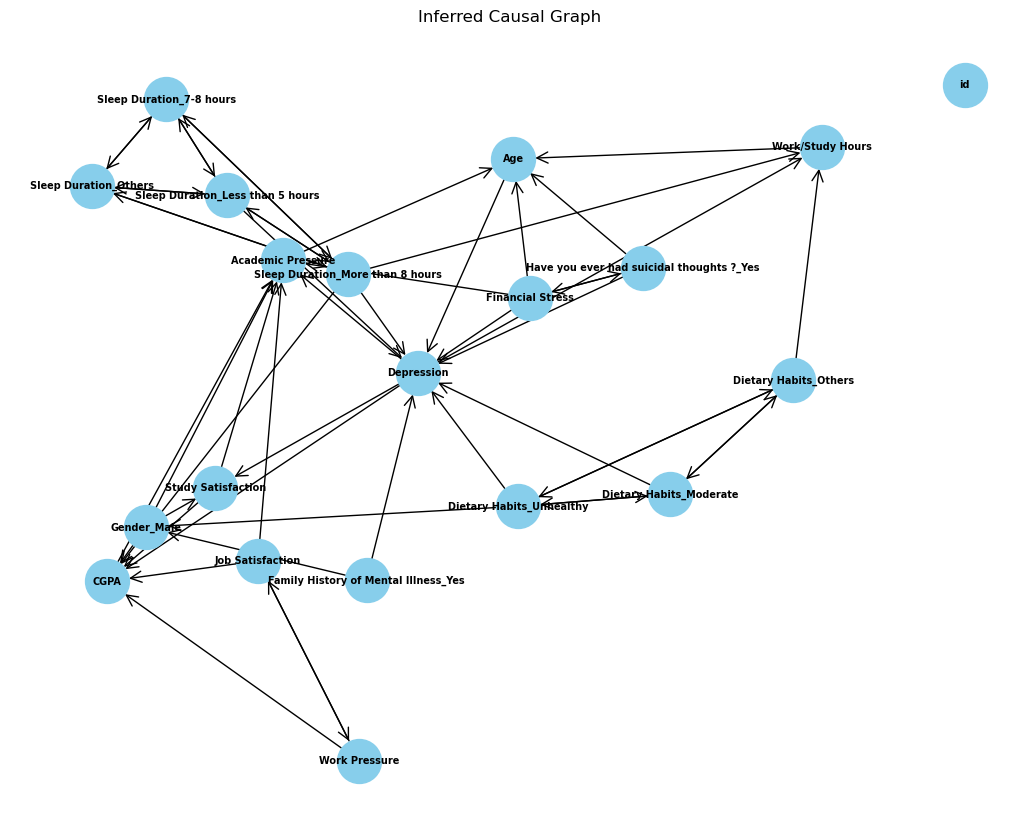

In [41]:
# Step 5: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Increase k for more space between nodes
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color="skyblue", font_size=7, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Inferred Causal Graph")
plt.show()

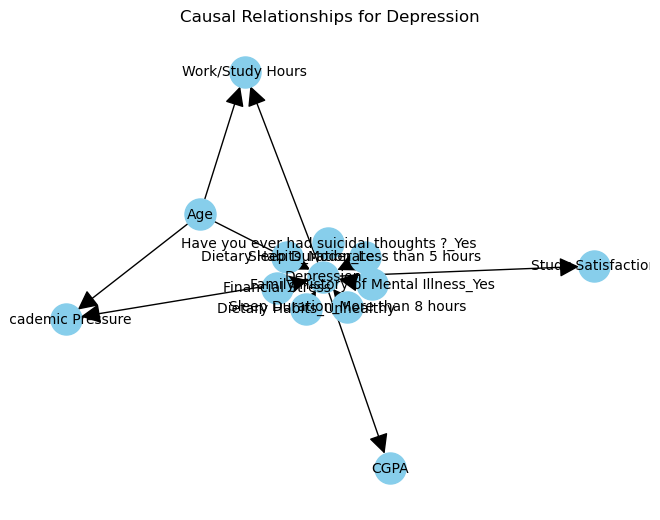

Parents of Depression: ['Age', 'Financial Stress', 'Sleep Duration_Less than 5 hours', 'Sleep Duration_More than 8 hours', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy', 'Have you ever had suicidal thoughts ?_Yes', 'Family History of Mental Illness_Yes']
Children of Depression: ['Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours']
Spouses of Depression: ['Age']


In [42]:
# Find the index of the "Revenue" node
revenue_index = list(data_encoded.columns).index("Depression")

# Get the adjacency matrix from the PC graph
graph_matrix = pc_graph.G.graph  # Assuming this is a NumPy array or similar

# Initialize sets for storing relationships
parents = set()
children = set()
spouses = set()
edges = []  # Store edges for graph visualization

# First Loop: Find direct relationships (parents and children)
for j in range(graph_matrix.shape[0]):
    if j == revenue_index:
        continue  # Skip self-loops

    if graph_matrix[j, revenue_index] == 1 and graph_matrix[revenue_index, j] == -1:
        # Directed edge (Revenue → j): j is a child
        children.add(j)
        edges.append((revenue_index, j))
    elif graph_matrix[revenue_index, j] == 1 and graph_matrix[j, revenue_index] == -1:
        # Directed edge (j → Revenue): j is a parent
        parents.add(j)
        edges.append((j, revenue_index))

# Second Loop: Identify spouses by checking for shared children
for child in children:
    for j in range(graph_matrix.shape[0]):
        if j == revenue_index or j in children:
            continue  # Skip self-loops and already identified children

        if graph_matrix[j, child] == 1 and graph_matrix[child, j] == -1:
            # Directed edge (child → j): j shares a child with Revenue
            spouses.add(j)
            edges.append((j, child))  # Add directed edge from spouse to the child

# Create a subgraph with only the related nodes (parents, children, spouses)
related_nodes = {revenue_index} | parents | children | spouses

# Create a directed graph
subgraph = nx.DiGraph()
subgraph.add_nodes_from(related_nodes)
subgraph.add_edges_from(edges)

# Map node indices to column names for readability
node_labels = list(data_encoded.columns)
subgraph = nx.relabel_nodes(subgraph, {i: node_labels[i] for i in related_nodes})

# Draw the subgraph
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=10, node_color="skyblue", arrowsize=30)
plt.title("Causal Relationships for Depression")
plt.show()

# Print the results
print("Parents of Depression:", [node_labels[i] for i in parents])
print("Children of Depression:", [node_labels[i] for i in children])
print("Spouses of Depression:", [node_labels[i] for i in spouses])


Done with a PC algorithm
In general;
- suicidal thoughts appear to be directly related to age + financial stress
- seems like the algorithm has found that a lot of things affect age(as a parent) even though we know that age is independent
-- includes academic pressure, work/study hours, financial stress
- unhealthy dietary habits and family history of mental illness related to gender(male)
- sleep was a bit related to diet habits but not too much

Causal graph of relating to Depression:
- Age, Financial Stress, Sleep Duration, Dietary Habits, Sucidal thoughts, and family history all seem to be direct factors for depression
- depression can go out to affect Academic Pressure, CGPA, Study Satisfaction/Work Hours
- and Age is soemthing that seems to affect those as well

Do we ask?
Are some factors (e.g., financial stress or sleep duration) stronger predictors of depression than others?
With the common sense we have, we can see that it would be more likely that age affects work/study hours, stress more than the other way around, what seems to be the work around?
- are we doing it wrong, Why might the PC algorithm link age to variables like academic pressure and work/study hours? Could this be due to data limitations or a spurious correlation in the dataset?

Are there feedback loops where depression worsens factors like CGPA, which then loop back to increase depression?


surescreening, lasso

figure out a cutoff of interest for the variables

In [58]:

import eli5
eli5.show_weights(regressor, top=-1, feature_names = X_train.columns.tolist())


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [52]:
!pip install eli5

     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/216.2 kB ? eta -:--:--
     ----- ------------------------------- 30.7/216.2 kB 163.8 kB/s eta 0:00:02
     ------- ----------------------------- 41.0/216.2 kB 178.6 kB/s eta 0:00:01
     ---------- -------------------------- 61.4/216.2 kB 233.8 kB/s eta 0:00:01
     --------------- --------------------- 92.2/216.2 kB 308.0 kB/s eta 0:00:01
     --------------- --------------------- 92.2/216.2 kB 308.0 kB/s eta 0:00:01
     ------------------------- ---------- 153.6/216.2 kB 416.7 kB/s eta 0:00:01
     ------------------------- ---------- 153.6/216.2 kB 416.7 kB/s eta 0:00:01
     ------------------------------------ 216.2/216.2 kB 471.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (set

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
distributed 2022.7.0 requires dask==2022.7.0, but you have dask 2.10.1 which is incompatible.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.3.3 which is incompatible.
spacy 3.7.2 requires typer<0.10.0,>=0.3.0, but you have typer 0.14.0 which is incompatible.
spyder 5.2.2 requires pyqt5<5.13, but you have pyqt5 5.15.10 which is incompatible.
torchvision 0.15.0 requires torch==2.0.0, but you have torch 2.5.1 which is incompatible.
